# Bayesian Optimization Result for LGBM

In [1]:
from functions import train_predict_ml, cross_validation, load_data
from lightgbm import LGBMClassifier
import lightgbm as lgb

# Test on Tuned Result

In [18]:
params={'learning_rate': 0.09767600511205632, 'max_depth': 13, 'min_child_samples': 5, 'num_leaves': 88, 'reg_alpha': 0.13123725784077744}

In [19]:
lgbm = LGBMClassifier(**params,random_state=42)
lgbm

LGBMClassifier(learning_rate=0.09767600511205632, max_depth=13,
               min_child_samples=5, num_leaves=88, random_state=42,
               reg_alpha=0.13123725784077744)

Accuracy Score: 
Train Accuracy Score  :  99.9500 %
Test Accuracy Score   :  61.0300 %
Training Time         :  135.2210

Classification Report: 
              precision    recall  f1-score   support

    Airplane       0.67      0.68      0.68      1000
  Automobile       0.72      0.74      0.73      1000
        Bird       0.52      0.47      0.49      1000
         Cat       0.44      0.42      0.43      1000
        Deer       0.53      0.58      0.55      1000
         Dog       0.49      0.49      0.49      1000
        Frog       0.64      0.69      0.66      1000
       Horse       0.69      0.66      0.67      1000
        Ship       0.67      0.68      0.68      1000
       Truck       0.70      0.70      0.70      1000

    accuracy                           0.61     10000
   macro avg       0.61      0.61      0.61     10000
weighted avg       0.61      0.61      0.61     10000


Confusion Matrix: 


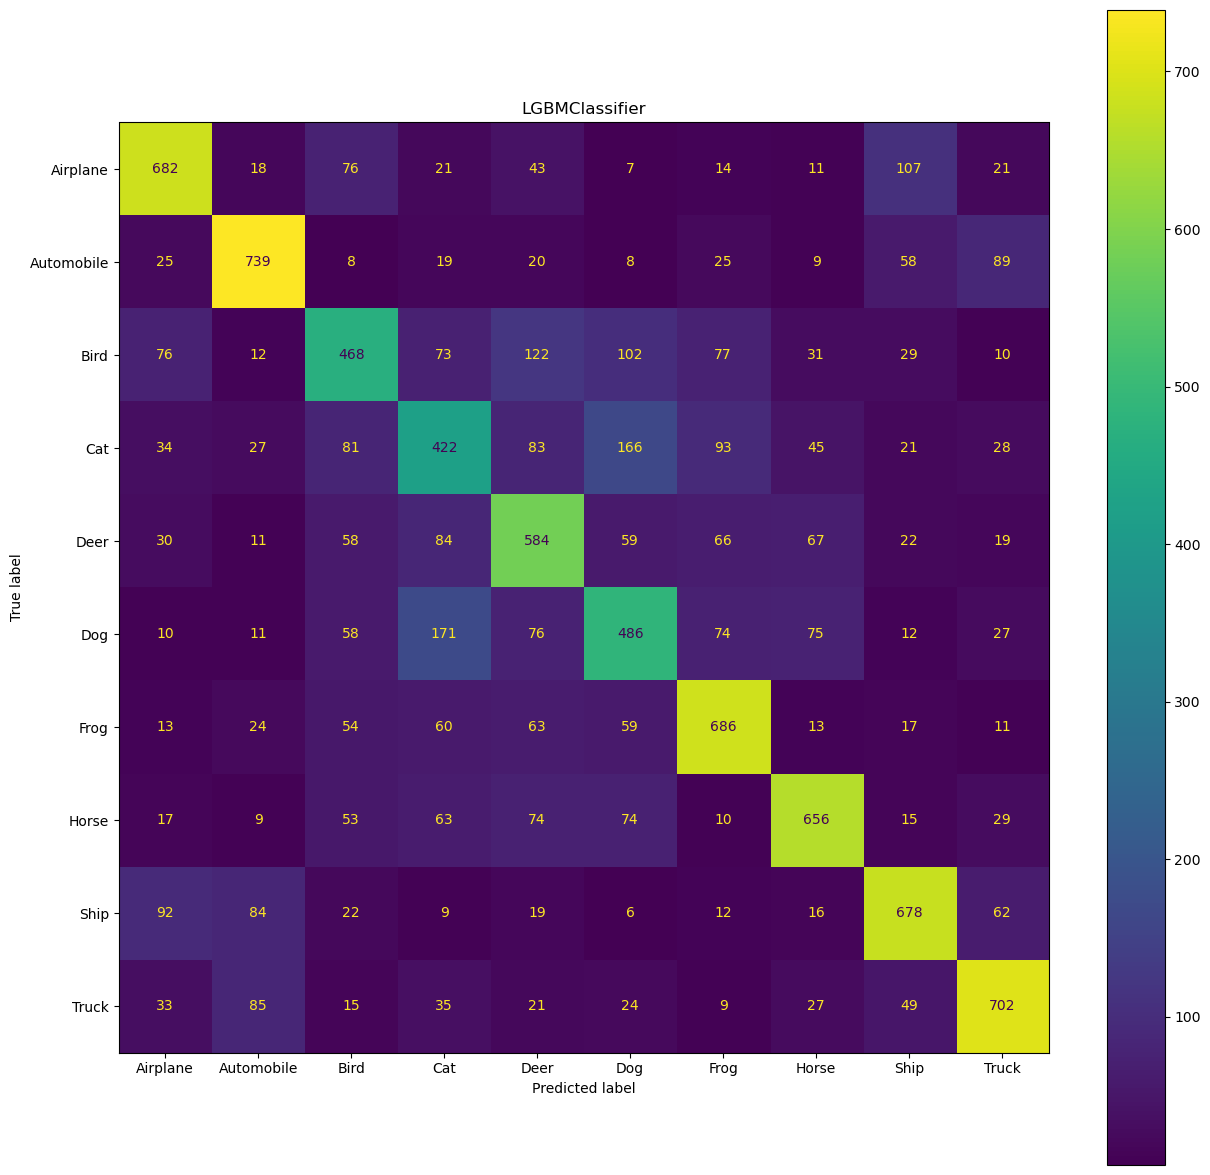

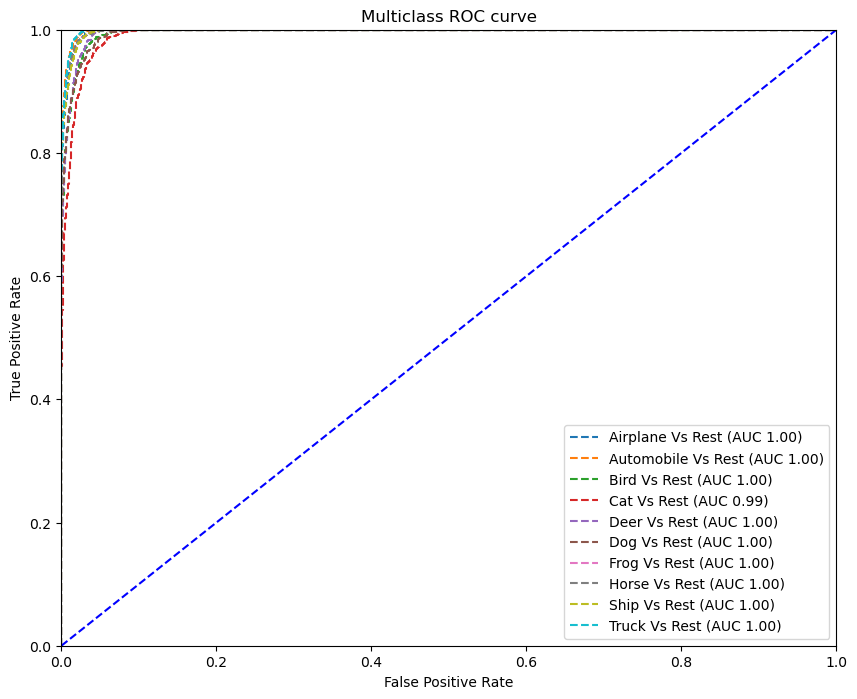


Predicted and Actual Test Set Results: 
Predicted Results: ['Cat', 'Ship', 'Ship', 'Airplane', 'Frog', 'Frog', 'Automobile', 'Frog', 'Cat', 'Automobile']
Actual Results: ['Cat', 'Ship', 'Automobile', 'Airplane', 'Frog', 'Frog', 'Dog', 'Frog', 'Cat', 'Automobile']



In [20]:
train_predict_ml(lgbm, data_train="../Data/train_hog.csv", data_test="../Data/test_hog.csv")

Model Accuracies:
Individual Accuracy: [0.6033 0.6035 0.6053 0.6027 0.6027]
Mean: 0.6034999999999999
Standard Deviation: 0.0009549869109050443
Training Time: 375.0706889629364


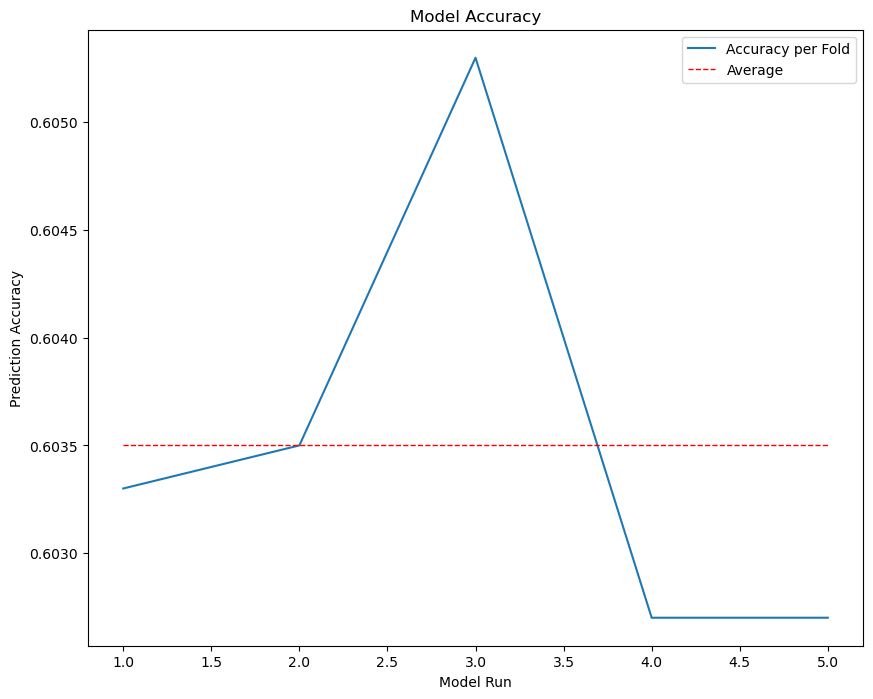

In [21]:
cross_validation(lgbm, data_train="../Data/train_hog.csv")

### Add early stopping to avoid overfitting issues

Terrible result --> ignore

In [4]:
from functions import load_data
(x_train, x_test, y_train, y_test) = load_data(data_train="../Data/train_hog.csv", data_test="../Data/test_hog.csv")

In [6]:
train_data = lgb.Dataset(x_train, label=y_train)
val_data = lgb.Dataset(x_test, label=y_test)

In [7]:
params = {
    'objective': 'binary',
    'metric': 'auc',
    'boosting_type': 'gbdt',
    'lambda_l1': 0.1,
    'lambda_l2': 0.1,
    'min_gain_to_split': 0.1,
    'num_leaves': 31,
    'learning_rate': 0.05,
    'verbose': -1
}

gbm = lgb.train(params,
                train_data,
                valid_sets=[val_data],
                early_stopping_rounds=10)

C:\Users\jiyeo\anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.804309
Training until validation scores don't improve for 10 rounds
[2]	valid_0's auc: 0.821565
[3]	valid_0's auc: 0.847317
[4]	valid_0's auc: 0.851289
[5]	valid_0's auc: 0.859633
[6]	valid_0's auc: 0.862669
[7]	valid_0's auc: 0.866918
[8]	valid_0's auc: 0.870739
[9]	valid_0's auc: 0.872626
[10]	valid_0's auc: 0.876906
[11]	valid_0's auc: 0.880457
[12]	valid_0's auc: 0.882049
[13]	valid_0's auc: 0.88448
[14]	valid_0's auc: 0.886256
[15]	valid_0's auc: 0.88823
[16]	valid_0's auc: 0.889656
[17]	valid_0's auc: 0.892217
[18]	valid_0's auc: 0.892942
[19]	valid_0's auc: 0.893532
[20]	valid_0's auc: 0.894281
[21]	valid_0's auc: 0.8957
[22]	valid_0's auc: 0.896864
[23]	valid_0's auc: 0.898245
[24]	valid_0's auc: 0.898588
[25]	valid_0's auc: 0.899434
[26]	valid_0's auc: 0.900475
[27]	valid_0's auc: 0.901957
[28]	valid_0's auc: 0.902852
[29]	valid_0's auc: 0.903684
[30]	valid_0's auc: 0.904845
[31]	valid_0's auc: 0.905419
[32]	valid_0's auc: 0.905548
[33]	valid_0's auc: 0.90

In [18]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Define the parameters for LGBM and create the train and test datasets
params = {'learning_rate': 0.0655224975751405, 'max_depth': 8, 'min_child_samples': 15, 'num_leaves': 71, 'reg_alpha': 0.25341385191007193}
dtrain = lgb.Dataset(X_train, label=y_train)
dtest = lgb.Dataset(X_test, label=y_test)

# Train the model with early stopping and a validation set
num_round = 100
early_stopping_rounds = 50
model = lgb.train(params, dtrain, num_round, valid_sets=[dtest], early_stopping_rounds=early_stopping_rounds)

# Predict on the test set and calculate the accuracy score
y_pred = model.predict(X_test)
y_pred = [round(val) for val in y_pred]
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)


C:\Users\jiyeo\anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.070020 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 82620
[LightGBM] [Info] Number of data points in the train set: 50000, number of used features: 324
[LightGBM] [Info] Start training from score 4.500000
[1]	valid_0's l2: 8.12009
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l2: 8.00317
[3]	valid_0's l2: 7.89024
[4]	valid_0's l2: 7.79181
[5]	valid_0's l2: 7.70107
[6]	valid_0's l2: 7.61446
[7]	valid_0's l2: 7.53231
[8]	valid_0's l2: 7.45535
[9]	valid_0's l2: 7.37706
[10]	valid_0's l2: 7.30829
[11]	valid_0's l2: 7.23913
[12]	valid_0's l2: 7.17351
[13]	valid_0's l2: 7.11562
[14]	valid_0's l2: 7.05867
[15]	valid_0's l2: 7.00361
[16]	valid_0's l2: 6.95216
[17]	valid_0's l2: 6.90595
[18]	valid_0's l2: 6.85684
[19]	valid_0's l2: 6.80957
[20]	valid_0's l2: 6.76751
[21]	valid_0's l2: 6.72383
[22]	valid_0's l2: 6.68472
[23]	va